# Problem_1

# Problem_2 Bayesian Optimisation

Optima: a=-3.000, x=108.900
Optima: b=-2.000, y=3.733


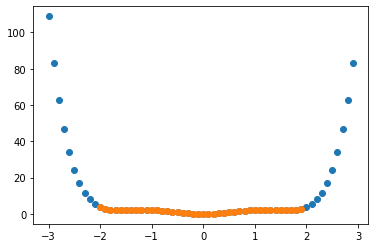

In [11]:
from numpy import arange
from numpy import argmax
from numpy.random import normal
from matplotlib import pyplot
 
# objective function
def objective(a, b):
	return ((4-2.1*a**2+(a**4)/3)*a**2+a*b+(-4+4*b**2)*b**2) 
 
# grid-based sample of the domain [-3,3]
A = arange(-3, 3, 0.1)
# sample the domain without noise
x = [objective(a, 0) for a in A]
# find best result
ia = argmax(x)
print('Optima: a=%.3f, x=%.3f' % (A[ia], x[ia]))
# plot the points without noise
pyplot.scatter(A, x)

# grid-based sample of the domain [-2,2]
B = arange(-2, 2, 0.1)
# sample the domain without noise
y = [objective(b, 0) for b in B]
# find best result
ib = argmax(y)
print('Optima: b=%.3f, y=%.3f' % (B[ib], y[ib]))
# plot the points without noise
pyplot.scatter(B, y)
# show the plot
pyplot.show()
pyplot.show()

In [ ]:
Scrap